In [86]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_youtube_comments = pd.read_csv("youtube_comments_concat.csv")

In [3]:
df_youtube_comments = df_youtube_comments.dropna()

## 년도별/계절별 댓글 topic 분류

### year

In [4]:
df_youtube_comments['date_year'].value_counts() # 2019 ~ 2024

date_year
2021    7732
2022    7009
2020    6413
2023    5794
2019    3158
2024    1216
Name: count, dtype: int64

In [5]:
df_youtube_comments

,_id,title,date,views,recommend,contents,reply,date_year,date_month,title_noun,dominant_topic_number,reply_clean_mecab,reply_clean_okt,reply_clean_mecab_withoutregion
0,6631d19b119b5f09bb9288e4,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,+해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...,2020,4,골방 신세 자 격리,2,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...,해당 영상 대한 수익금 일부 대한민국 의료 진 기부 점점 상황 사태 대한 조심성...,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...
1,6631d19b119b5f09bb9288e5,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...,2020,4,골방 신세 자 격리,2,가족 메뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경,가족 메뉴얼 공항 철 격리 절차 과정 정말 시국 모습 부모님 존경 스럽다,가족 뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경
2,6631d19b119b5f09bb9288e6,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,평소에 조카한테 얼마나 잘해줫으면 저렇게 삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...,2020,4,골방 신세 자 격리,2,평소 조카 삼촌 사람,평소 조카 얼마나 잘 줫으 삼촌 좋 좋다 사람 게 화팅,평소 조카 삼촌 사람
3,6631d19c119b5f09bb9288e7,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...,2020,4,골방 신세 자 격리,2,눈물 부모 아들 방 플랜 카드 생각,누구 잘 우리 부모님 들 설레다 방 플랜카드 생각 하니 벅차다,눈물 부모 아들 방 플랜 카드 생각
4,6631d19c119b5f09bb9288e8,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...,2020,4,골방 신세 자 격리,2,부모 세계 응원 플랜 카드 격리 창고 정리 센스,부모님 세계 여행 응원 대단 플랜카드 격리 창고 정리 센스 좋다,부모 세계 응원 플랜 카드 격리 창고 정리 센스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34451,6631cc977547545ba205e82c,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메일이 있다는건 첨 알았네요. 해외 여행하시는 분들 국내는 다 가보고 해외여행...,2021,10,가을 영월 곳 메밀 꽃 강원도,1,메일 해외 국내 해외 방식 국내 때,붉다 메일 해외 여행 국내 해외여행 방식 영상 국내 유명 곳 여행 때 십년 같다,일 해외 해외 방식
34452,6631cc977547545ba205e82d,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월에 선돌.한반도지형은\n가봤는데 붉은메밀꽃밭\n가보려는데 카카오네비에\n주소 쳐...,2021,10,가을 영월 곳 메밀 꽃 강원도,1,영월 선돌 한반도 지형 메밀꽃 밭 카카오 네비 주소 영월군 목골 마을 네비 주소,영월 선돌 한반도 지형 붉다 메밀 꽃밭 카카오 네 비 주소 안 영월군 목골 마을 안...,영월 선돌 한반도 지형 밀꽃 밭 카카오 네비 주소 영월군 목골 마을 네비 주소
34453,6631cc977547545ba205e82e,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월 ...강추 여행지!!!!!!\n감히 한마디 하자면 ㅋㅋㅋㅋ \n청령포 추가요,2021,10,가을 영월 곳 메밀 꽃 강원도,1,영월 강추 한마디 청령포 추가,영월 강추 여행지 감히 한마디 하자 청령포 추가,영월 강추 한마디 청령포 추가
34454,6631cc977547545ba205e82f,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메밀은 어디가야 볼 수 있을까요? 주소가 궁금합니다,2021,10,가을 영월 곳 메밀 꽃 강원도,1,메밀 주소,붉다 메밀 어디가 볼 수 주소 궁금,밀 주소


In [6]:
pattern = '쏘|곳|이|때|추천|킴스|번|곽|메|유|인|전|대|소개|국내'
df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply_clean_mecab'].str.replace(pattern, '', regex=True)

In [7]:
from wordcloud import WordCloud
from collections import Counter

### 연도별로 힐링/예약의 빈도 count 

In [63]:
df_sheets_2024

['  감상',
 '영남 등나무  올해',
 '임실 달 작약 꽃',
 '변산 샤스타 데지 시기',
 '임실 변산 천북 코스',
 '마당 도서관 주말 사람 당일치기  ',
 '마산 반려 견동 반',
 '   수고',
 '익  안내 채널 후회   감 삼종 세트 응원 시차 희망',
 '벚꽃 진해 창원 통도사 목련',
 '몸 마음 계절 남지 채 밭 근 개 비리 길 벚꽃 연지 못 만년교 채널 응원',
 '반려 동물 입장 여부',
 '안녕 기억  채널 응원   ',
 '르 방문',
 '고향 진안',
 '반려 견동 가능 ',
 '쯤',
 '맛집 공',
 ' 봄날  ',
 '조치원 조천 천변 종시',
 '오른쪽 밑부분  부분',
 '제주 녹산 로요',
 '릉원 추억',
 '릉원 무료입장',
 '  ',
 '서울 모험가 덕분 순천 세계 정원  방문 기억 장소 ',
 ' 중교통 동편 ',
 '데트 장소 정할  도움',
 '  광 양매 화마 매화꽃 절정',
 '  설명  표      수고 시청',
 '닭 블로그 블로그',
 '자막 서시 산동  구례읍 구례 토박 내용 말씀',
 '후회    시기  후회 스타일 님  일부 갈증',
 '봄   ',
 '봄 비 화요일 오 친 후회   방문  클릭 클릭 친 박수 응원',
 '안녕 미 목소리 ',
 '정리 ',
 ' 제철 남쪽 봄 서울 봄 봄 마중 남쪽 제철    설명 사진 사람 사진 팁 채널  시청 수고',
 '영행 코스 개 아쉬움',
 '처음 꽃밭',
 '수도 거주자',
 '통도사 코레 일',
 '부산    제목 그로',
 ' ',
 '도래 행복  방문  용   힘 감동 말 친  즐거움 돌핀 행복감 친 채널  시간 시간  고생 건강 보람 나날 행복 건강 행운 친 기원 엄지',
 ' 크리에터 모험가  힐링 금정 뷰 떼목 장 눈',
 '지방',
 ' 화',
 '혼자   ',
 '행복',
 '안젤리나 가 행복 목소리 나레션  주행',
 '강연 엔젤 리니 거  강연 고생 나레션 라디오 법 목소리',
 '미  튜버 주행 처제',
 '젊음 모습',

In [81]:
healing_counts = df_youtube_comments[df_youtube_comments['reply_clean_mecab'].str.contains('힐링')].groupby('date_year').size()
healing_counts

date_year
2019     90
2020    254
2021    349
2022    239
2023    129
2024     29
dtype: int64

In [82]:
reservation_counts = df_youtube_comments[df_youtube_comments['reply_clean_mecab'].str.contains('예약')].groupby('date_year').size()
reservation_counts

date_year
2019      8
2020     13
2021     21
2022     67
2023    211
2024     59
dtype: int64

In [88]:
import seaborn as sns

<Axes: title={'center': "연도별 '힐링' 등장 빈도"}, xlabel='date_year'>

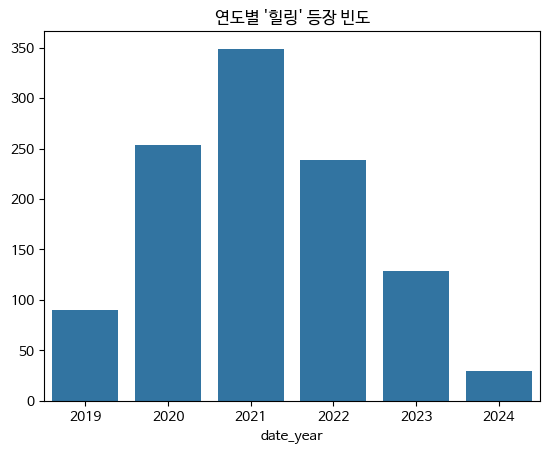

In [89]:
plt.title("연도별 '힐링' 등장 빈도")
sns.barplot(data=healing_counts)

<Axes: title={'center': "연도별 '예약' 등장 빈도"}, xlabel='date_year'>

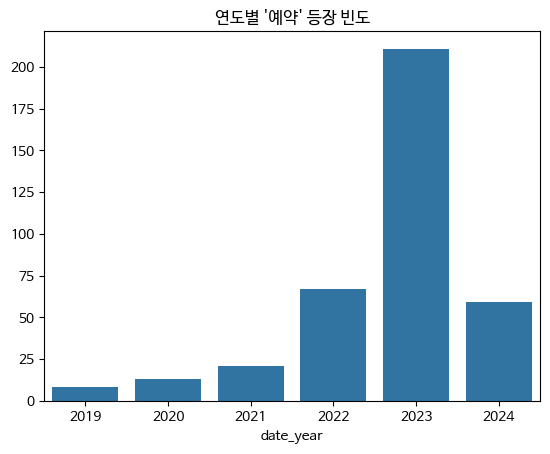

In [90]:
plt.title("연도별 '예약' 등장 빈도")
sns.barplot(data=reservation_counts)

#### 2019

In [8]:
df_sheets_2019 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2019")['reply_clean_mecab'].items() :
  df_sheets_2019.append(df)

In [9]:
text = ' '.join(map(str, df_sheets_2019))
text_split = text.split()
text_split_count = Counter(text_split)

In [10]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [11]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

In [12]:
wordCloud.words_

{'경주': 1.0,
 '가을': 0.9324324324324325,
 '밀양': 0.7972972972972973,
 '길': 0.7905405405405406,
 '사람': 0.7094594594594594,
 '힐링': 0.6621621621621622,
 '겨울': 0.6418918918918919,
 '설명': 0.6351351351351351,
 '행복': 0.6148648648648649,
 '주': 0.6148648648648649,
 '생각': 0.5945945945945946,
 '풍경': 0.5878378378378378,
 '코스': 0.5878378378378378,
 '집': 0.581081081081081,
 '음악': 0.5743243243243243,
 '다음': 0.5608108108108109,
 '언니': 0.5608108108108109,
 '최고': 0.5608108108108109,
 '시간': 0.5472972972972973,
 '친구': 0.5067567567567568,
 '눈': 0.49324324324324326,
 '한국': 0.44594594594594594,
 '제주도': 0.44594594594594594,
 '도움': 0.44594594594594594,
 '맛집': 0.4391891891891892,
 '제주': 0.4391891891891892,
 '말': 0.4391891891891892,
 '덕분': 0.4391891891891892,
 '앞': 0.43243243243243246,
 '꽃': 0.43243243243243246}

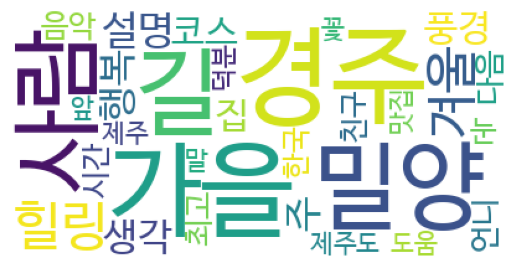

In [13]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 가을, 경주, 밀양, 길, 사람, 힐링
- 19년도엔 가을, 경주, 밀양에 관심이 많았다.

#### 2020

In [14]:
df_sheets_2020 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2020")['reply_clean_mecab'].items() :
  df_sheets_2020.append(df)

In [15]:
text = ' '.join(map(str, df_sheets_2020))

In [16]:
text_split = text.split()
text_split_count = Counter(text_split)

In [17]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [18]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

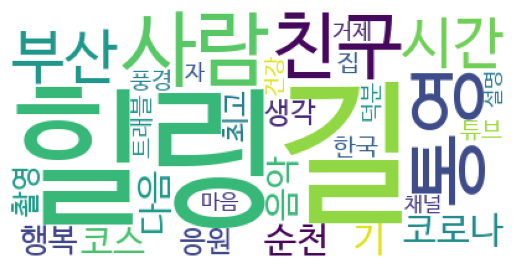

In [19]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 힐링, 길, 사람, 통영, 부산, 친구, 코로나
- 이때부터 힐링 여행이 떠오르기 시작한 것으로 예상

#### 2021

In [20]:
df_sheets_2021 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2021")['reply_clean_mecab'].items() :
  df_sheets_2021.append(df)

In [21]:
text = ' '.join(map(str, df_sheets_2021))
text_split = text.split()
text_split_count = Counter(text_split)

In [22]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [23]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

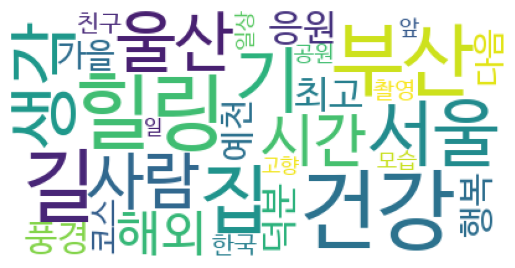

In [24]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 건강, 힐링, 부산, 서울, 집, 울산
- 20년부터 코로나로 인해 지친 사람들이 건강, 힐링 여행을 많이 찾았던 것으로 예상

#### 2022

In [25]:
df_sheets_2022 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2022")['reply_clean_mecab'].items() :
  df_sheets_2022.append(df)

In [26]:
text = ' '.join(map(str, df_sheets_2022))
text_split = text.split()
text_split_count = Counter(text_split)

In [27]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [28]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

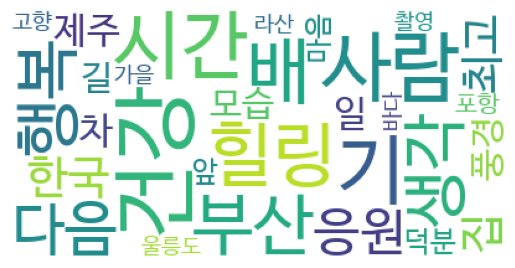

In [29]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 건강, 사람, 힐링, 부산, 시간

#### 2023

In [30]:
df_sheets_2023 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2023")['reply_clean_mecab'].items() :
  df_sheets_2023.append(df)

In [31]:
text = ' '.join(map(str, df_sheets_2023))
text_split = text.split()
text_split_count = Counter(text_split)

In [32]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [33]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

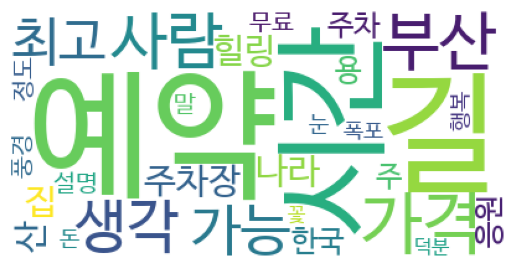

In [34]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 예약, 가격, 시간, 길, 부산, 생각
- 23년에는 부산 여행을 많이 갔다? -> 단순히 부산 여행 영상의 댓글이 많았을 수도 있음
- 주로 예약하는듯

#### 2024

In [35]:
df_sheets_2024 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2024")['reply_clean_mecab'].items() :
  df_sheets_2024.append(df)

In [36]:
text = ' '.join(map(str, df_sheets_2024))
text_split = text.split()
text_split_count = Counter(text_split)

In [37]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [38]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

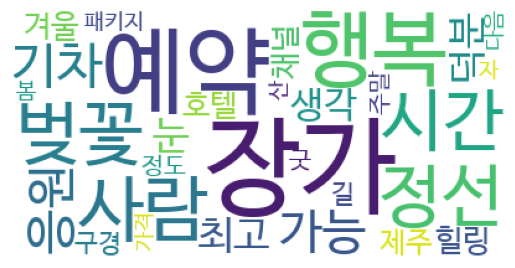

In [39]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 장가, 예약, 행복, 사람, 벚꽃, 기차
- 24년이 아직 5월초이므로 겨울, 벚꽃이 많이 나타나는 것으로 예상
- 마찬가지로, 예약이 크게 나타나는 이유는 상반기에 예약을 잡고 하반기에 여행을 가기 때문으로 예상

### season
- 워드클라우드 결과가 계절별 유의미하게 구분되지 않음
- 영상 업로드 날짜와 영상 촬영일에 차이가 있을 수 있으므로 분석 정확하지 않음

In [40]:
df_youtube_comments['date_month'].value_counts()

date_month
5     3728
6     3589
10    3530
9     3123
4     3027
11    2926
7     2830
3     1960
1     1864
12    1760
2     1621
8     1364
Name: count, dtype: int64

- 12, 1, 2 winter
- 3, 4, 5 spring
- 6, 7, 8 summer
- 9, 10, 11 fall

In [41]:
seasons = {
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
}
df_youtube_comments['season'] = df_youtube_comments['date_month'].map(seasons)

In [42]:
df_youtube_comments['season'].value_counts()

season
가을    9579
봄     8715
여름    7783
겨울    5245
Name: count, dtype: int64

#### 봄

In [43]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '봄'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [44]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [45]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [46]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

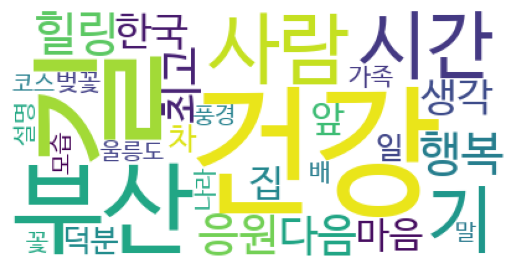

In [47]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 여름

In [48]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '여름'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [49]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [50]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [51]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

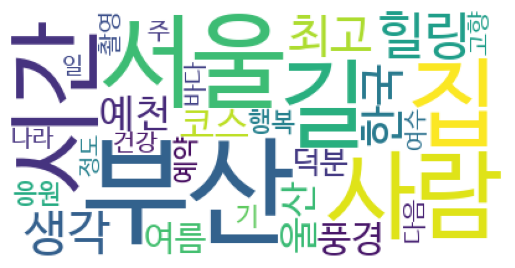

In [52]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 가을

In [53]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '가을'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [54]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [55]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [56]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

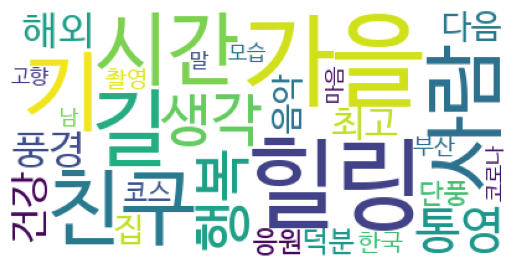

In [57]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 겨울

In [58]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '겨울'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [59]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [60]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [61]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

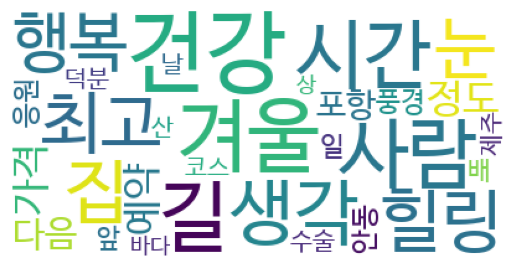

In [62]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()